<a href="https://colab.research.google.com/github/Yogiii13/Google-Colab-/blob/main/amazonsalesreport.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df = pd.read_csv('/content/Amazon Sale Report.csv', low_memory=False)

In [ ]:
print("First few rows of the dataset:")
display(df.head())

First few rows of the dataset:


,index,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Style,SKU,Category,...,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,promotion-ids,B2B,fulfilled-by,Unnamed: 22
0,0,405-8078784-5731545,04-30-22,Cancelled,Merchant,Amazon.in,Standard,SET389,SET389-KR-NP-S,Set,...,INR,647.62,MUMBAI,MAHARASHTRA,400081.0,IN,NaN,False,Easy Ship,NaN
1,1,171-9198151-1101146,04-30-22,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,JNE3781,JNE3781-KR-XXXL,kurta,...,INR,406.00,BENGALURU,KARNATAKA,560085.0,IN,Amazon PLCC Free-Financing Universal Merchant ...,False,Easy Ship,NaN
2,2,404-0687676-7273146,04-30-22,Shipped,Amazon,Amazon.in,Expedited,JNE3371,JNE3371-KR-XL,kurta,...,INR,329.00,NAVI MUMBAI,MAHARASHTRA,410210.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,True,NaN,NaN
3,3,403-9615377-8133951,04-30-22,Cancelled,Merchant,Amazon.in,Standard,J0341,J0341-DR-L,Western Dress,...,INR,753.33,PUDUCHERRY,PUDUCHERRY,605008.0,IN,NaN,False,Easy Ship,NaN
4,4,407-1069790-7240320,04-30-22,Shipped,Amazon,Amazon.in,Expedited,JNE3671,JNE3671-TU-XXXL,Top,...,INR,574.00,CHENNAI,TAMIL NADU,600073.0,IN,NaN,False,NaN,NaN


In [ ]:
# Dataset dimensions
print("Shape (Rows, Columns):", df.shape)


Shape (Rows, Columns): (128975, 24)


In [ ]:
# Column names
print("\nColumn Names:")
print(df.columns.tolist())


Column Names:
['index', 'Order ID', 'Date', 'Status', 'Fulfilment', 'Sales Channel ', 'ship-service-level', 'Style', 'SKU', 'Category', 'Size', 'ASIN', 'Courier Status', 'Qty', 'currency', 'Amount', 'ship-city', 'ship-state', 'ship-postal-code', 'ship-country', 'promotion-ids', 'B2B', 'fulfilled-by', 'Unnamed: 22']


In [ ]:
# Data types of each column
print("\nData Types:")
print(df.dtypes)


Data Types:
index                   int64
Order ID               object
Date                   object
Status                 object
Fulfilment             object
Sales Channel          object
ship-service-level     object
Style                  object
SKU                    object
Category               object
Size                   object
ASIN                   object
Courier Status         object
Qty                     int64
currency               object
Amount                float64
ship-city              object
ship-state             object
ship-postal-code      float64
ship-country           object
promotion-ids          object
B2B                      bool
fulfilled-by           object
Unnamed: 22            object
dtype: object


In [ ]:
#  Experiment 3: Missing Values
print("Missing Values in Each Column:")
print(df.isnull().sum())

Missing Values in Each Column:
index                     0
Order ID                  0
Date                      0
Status                    0
Fulfilment                0
Sales Channel             0
ship-service-level        0
Style                     0
SKU                       0
Category                  0
Size                      0
ASIN                      0
Courier Status         6872
Qty                       0
currency               7795
Amount                 7795
ship-city                33
ship-state               33
ship-postal-code         33
ship-country             33
promotion-ids         49153
B2B                       0
fulfilled-by          89698
Unnamed: 22           49050
dtype: int64


In [ ]:
df.drop(columns=['Unnamed: 22'], inplace=True)

In [ ]:
df.dropna(subset=['ship-city', 'ship-state', 'ship-postal-code', 'ship-country'], inplace=True)

In [ ]:
df.dropna(subset=['currency', 'Amount'], inplace=True)

In [ ]:
df['Courier Status'] = df['Courier Status'].fillna('Unknown')

In [ ]:
 df['fulfilled-by'] = df['fulfilled-by'].fillna("Unknown")

In [ ]:
df['promotion-ids'] = df['promotion-ids'].fillna('unknown')

In [ ]:
print(df.isnull().sum())

index                 0
Order ID              0
Date                  0
Status                0
Fulfilment            0
Sales Channel         0
ship-service-level    0
Style                 0
SKU                   0
Category              0
Size                  0
ASIN                  0
Courier Status        0
Qty                   0
currency              0
Amount                0
ship-city             0
ship-state            0
ship-postal-code      0
ship-country          0
promotion-ids         0
B2B                   0
fulfilled-by          0
dtype: int64


In [ ]:
# Count duplicates
print("Number of Duplicate Rows:", df.duplicated().sum())
# Drop duplicates if necessary
df = df.drop_duplicates()

Number of Duplicate Rows: 0


In [ ]:
# Experiment 5: Descriptive Statistics
# 📌 Objective:
# Summarize numerical and categorical data.
# Summary for numerical columns
df['Amount'].describe()


,Amount
count,121149.000000
mean,648.573305
std,281.222115
min,0.000000
25%,449.000000
50%,605.000000
75%,788.000000
max,5584.000000


In [ ]:
# Median
print("Median Amount:", df['Amount'].median())

Median Amount: 605.0


In [ ]:
# Categorical stats
print("\nOrder Status Distribution:")
print(df['Status'].value_counts())


Order Status Distribution:
Status
Shipped                          77580
Shipped - Delivered to Buyer     28754
Cancelled                        10761
Shipped - Returned to Seller      1947
Shipped - Picked Up                973
Pending                            656
Pending - Waiting for Pick Up      281
Shipped - Returning to Seller      145
Shipped - Out for Delivery          35
Shipped - Rejected by Buyer         11
Shipped - Lost in Transit            5
Shipped - Damaged                    1
Name: count, dtype: int64


In [ ]:
print("\nCategory Distribution:")
print(df['Category'].value_counts())


Category Distribution:
Category
Set              47031
kurta            46700
Western Dress    14703
Top              10163
Ethnic Dress      1093
Blouse             881
Bottom             420
Saree              155
Dupatta              3
Name: count, dtype: int64


<ipython-input-21-293d26a41ce4>:7: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Date'] = pd.to_datetime(df['Date'], errors='coerce')


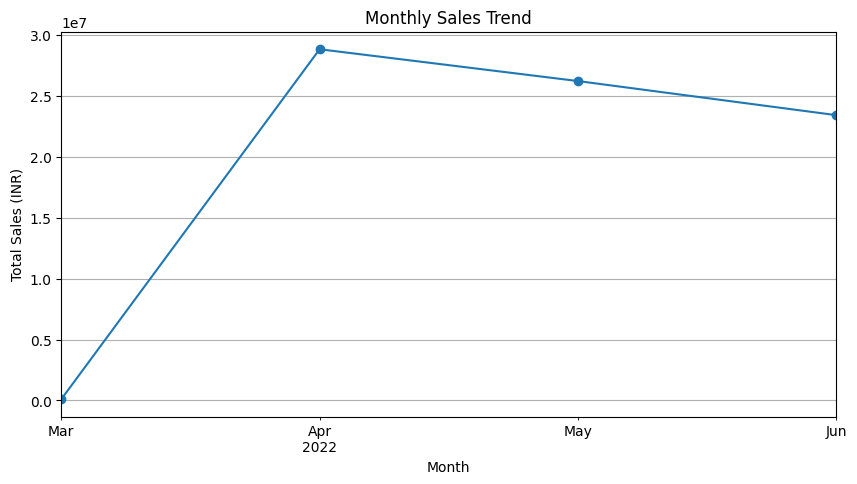

In [ ]:
# Experiment 6: Sales Analysis Over Time
# 📌 Objective:
# Visualize sales trends over time.
import matplotlib.pyplot as plt

# Convert to datetime
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

# Group by month
monthly_sales = df.groupby(df['Date'].dt.to_period('M'))['Amount'].sum()
monthly_sales.plot(kind='line', marker='o', title='Monthly Sales Trend', figsize=(10,5))
plt.ylabel("Total Sales (INR)")
plt.xlabel("Month")
plt.grid(True)
plt.show()

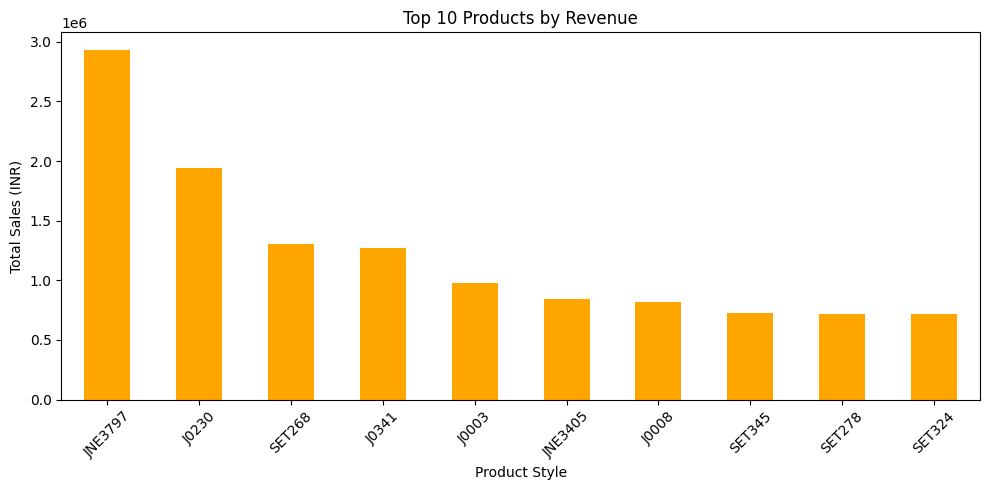

In [ ]:
# Total sales per product style
product_performance = df.groupby('Style')['Amount'].agg(['sum', 'count']).sort_values(by='sum', ascending=False).head(10)

# Plot
product_performance['sum'].plot(kind='bar', color='orange', figsize=(10,5), title='Top 10 Products by Revenue')
plt.ylabel("Total Sales (INR)")
plt.xlabel("Product Style")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [ ]:
#  Experiment 8: Customer Behavior Analysis
# 📌 Objective:
# Understand purchase behavior by order.
# Group by Order ID
orders = df.groupby('Order ID').agg({
    'Amount': 'sum',
    'SKU': 'count'
}).rename(columns={'Amount': 'Order Value', 'SKU': 'Items Per Order'})

print("Average Order Value (INR):", round(orders['Order Value'].mean(), 2))
print("Average Items per Order:", round(orders['Items Per Order'].mean(), 2))
print("Total Unique Orders:", orders.shape[0])


Average Order Value (INR): 695.32
Average Items per Order: 1.07
Total Unique Orders: 113004


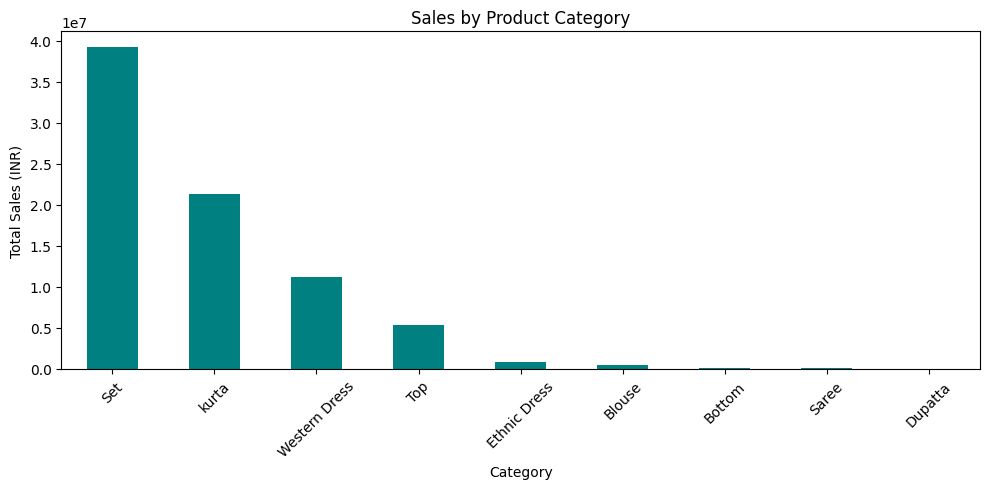

In [ ]:
# Experiment 9: Category-wise Sales Analysis
# 📌 Objective:
# Compare sales across different product categories.
# Group by category
category_sales = df.groupby('Category')['Amount'].sum().sort_values(ascending=False)

# Plot
category_sales.plot(kind='bar', color='teal', figsize=(10,5), title='Sales by Product Category')
plt.ylabel("Total Sales (INR)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


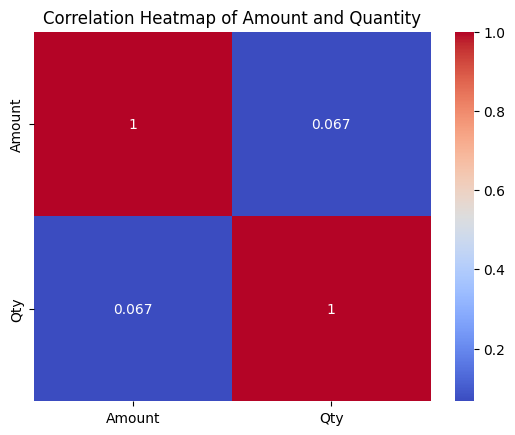

In [ ]:
# Experiment 10: Correlation Analysis
# 📌 Objective:
# Explore relationships between numerical features.
import seaborn as sns
numerical_cols = ['Amount', 'Qty']

# Calculate the correlation matrix
correlation_matrix = df[numerical_cols].corr()

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap of Amount and Quantity")
plt.show()

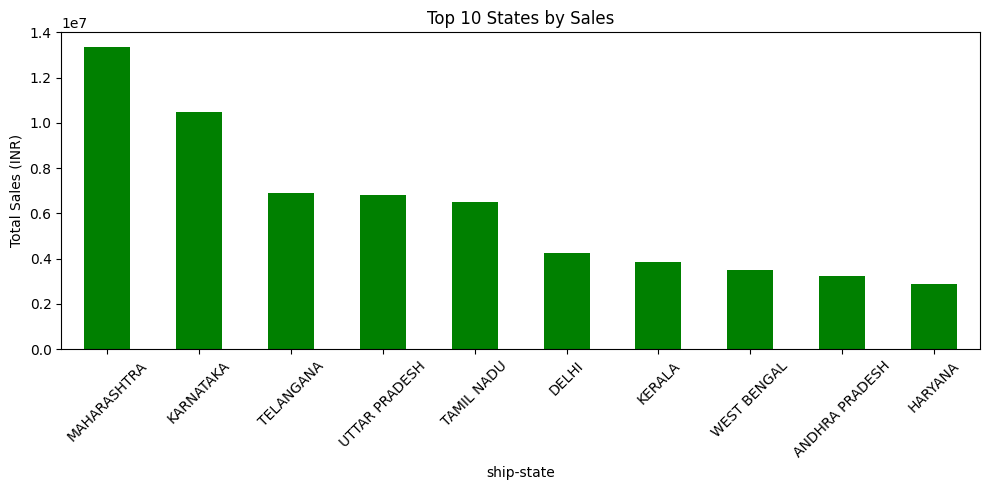

In [ ]:
# Experiment 11: Regional Sales Analysis
# 📌 Objective:
# Compare sales performance across different states.
# Group by shipping state

state_sales = df.groupby('ship-state')['Amount'].sum().sort_values(ascending=False).head(10)

# Plot
state_sales.plot(kind='bar', color='green', figsize=(10,5), title='Top 10 States by Sales')
plt.ylabel("Total Sales (INR)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
